In [2]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime
import lifetimes
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix, plot_period_transactions
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes import ParetoNBDFitter
from sklearn.metrics import mean_squared_error, r2_score
import math
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from datetime import datetime, timedelta,date
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [3]:
df1=pd.read_csv('Year 2009-2010.csv',encoding='cp1252')
df2=pd.read_csv('Year 2010-2011.csv',encoding='cp1252')

In [4]:
df=pd.concat([df1, df2], axis=0, ignore_index=True)


In [5]:
df.shape

(1067371, 8)

In [6]:
print(df1.shape)
print(df2.shape)

(525461, 8)
(541910, 8)


In [7]:

df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
x=df['Country'].value_counts().reset_index()

In [10]:
px.scatter(x, y = "Country", color = x.index) 

In [11]:
df['Country'].value_counts().head(5)

United Kingdom    741301
Germany            17624
EIRE               16195
France             14202
Netherlands         5140
Name: Country, dtype: int64

In [12]:
df['Invoice'].nunique()

44876

In [13]:
Top_prices= (df.groupby(["Invoice"]).mean().sort_values("Price", ascending = False).head(10).drop(['Quantity','Customer ID'], axis=1).reset_index())
Top_prices

Invoice     Price
0  C556445  38970.00
1  C512770  25111.09
2  C502264  10953.50
3   502263  10953.50
4  C502262  10953.50
5   524159  10468.80
6  C522793  10468.80
7  C525398  10468.80
8  C496116   8985.60
9   496115   8985.60

In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [15]:
df_analysis=df.copy()

In [16]:

df_analysis['Month'] = df_analysis['InvoiceDate'].dt.month
df_analysis['Month'] = df_analysis['InvoiceDate'].dt.month
df_analysis['Year'] = df_analysis['InvoiceDate'].dt.year
df_analysis['Day'] = df_analysis['InvoiceDate'].dt.day
df_analysis['Quarter'] = df_analysis['InvoiceDate'].dt.quarter
df_analysis['Day of Week'] = df_analysis['InvoiceDate'].dt.dayofweek


In [17]:
dayofweek_mapping = dict({0: "Monday", 1: "Tuesday", 
                         2: "Wednesday" ,  3: "Thursday", 
                         4: "Friday", 5: "Saturday", 6: "Sunday"})

In [18]:
df_analysis["Day of Week"] = df_analysis["Day of Week"].map(dayofweek_mapping)

### Make analysis plots for when products are bought

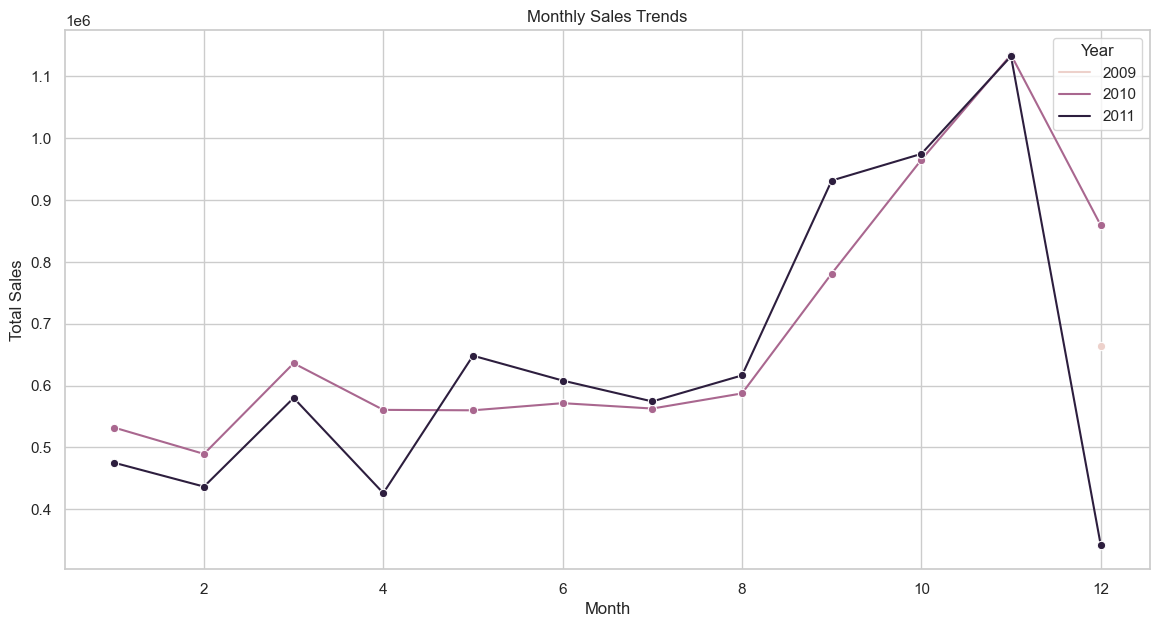

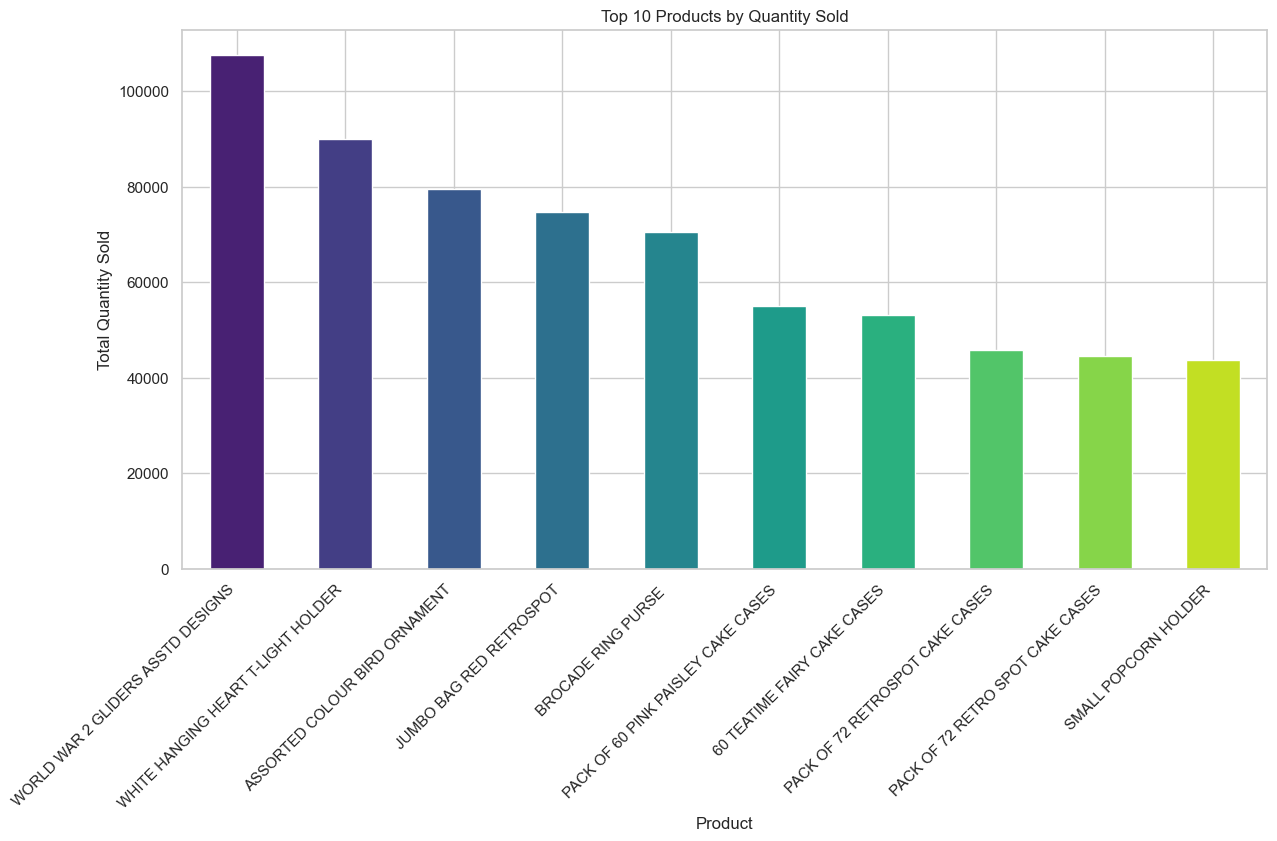

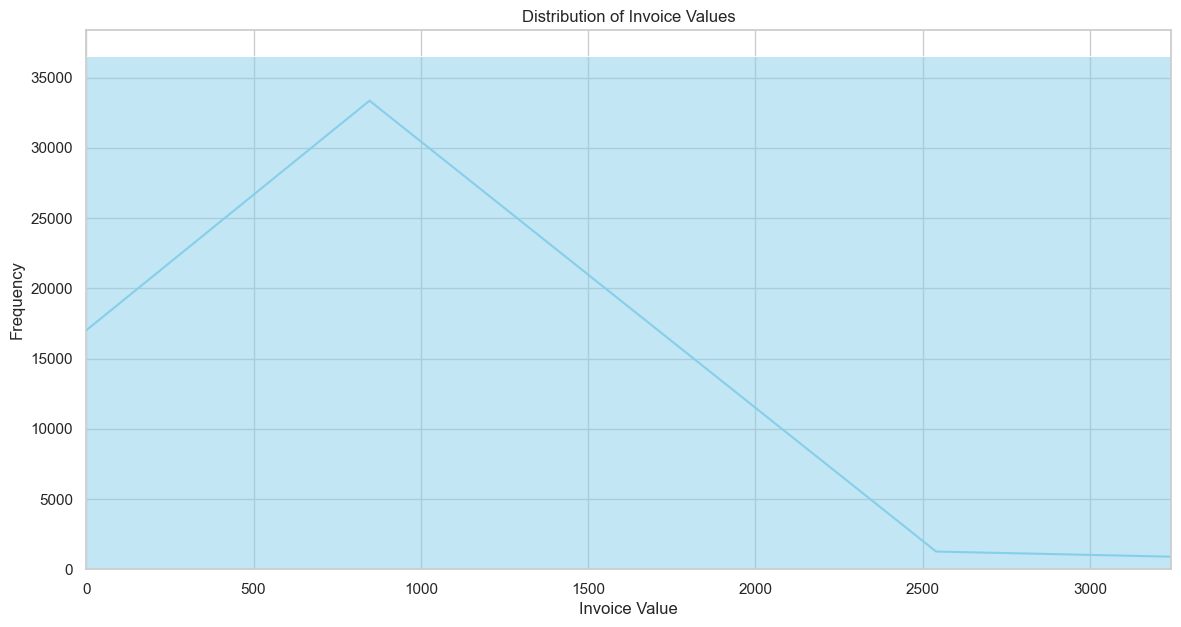

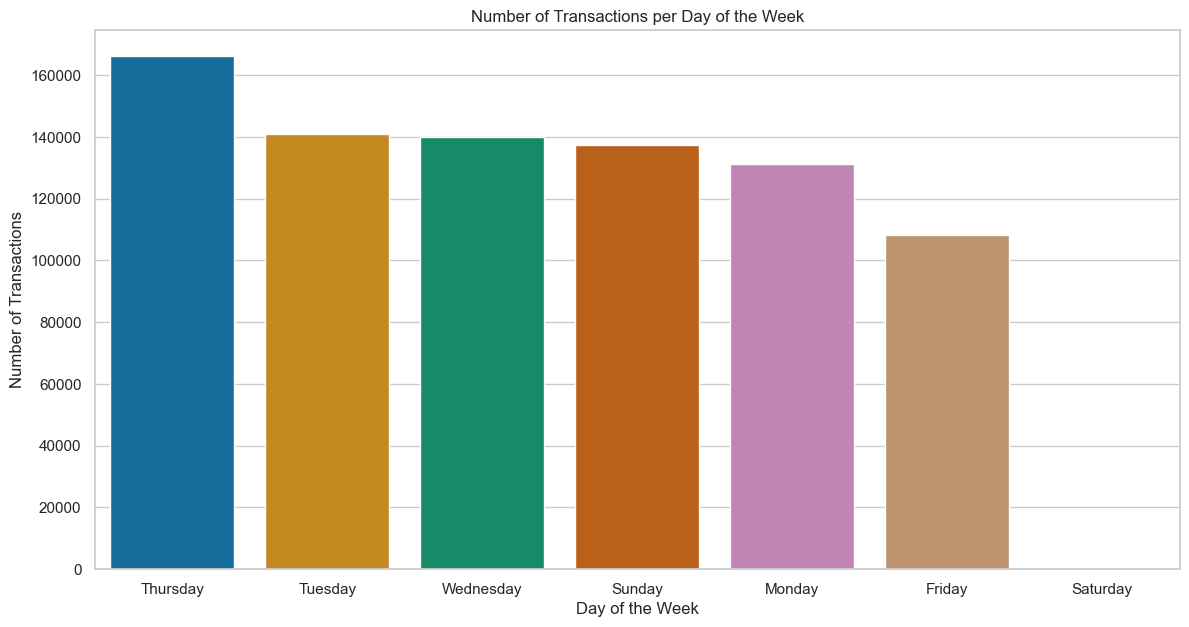

In [24]:
import seaborn as sns
sns.set_style("whitegrid")

# Sales trends over time by month and year
df_analysis['TotalPrice'] = df_analysis['Quantity'] * df_analysis['Price']
monthly_sales = df_analysis.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()


monthly_sales_pivot = monthly_sales.pivot('Month', 'Year', 'TotalPrice')

# sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

# Top 10 items by quantity sold
top_products = df_analysis.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
top_products.plot(kind='bar', color=sns.color_palette("viridis", 10))
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


# Calculate invoice values
invoice_values = df_analysis.groupby('Invoice')['TotalPrice'].sum()

plt.figure(figsize=(14, 7))
sns.histplot(invoice_values, bins=100, kde=True, color='skyblue')
plt.title('Distribution of Invoice Values')
plt.xlabel('Invoice Value')
plt.ylabel('Frequency')
plt.xlim(0, invoice_values.quantile(0.99))  
plt.show()

# Number of transactions per day of the week
transactions_per_day = df_analysis['Day of Week'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette='colorblind')
plt.title('Number of Transactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

In [20]:
invoice_values

Invoice
489434        505.30
489435        145.80
489436        630.33
489437        310.75
489438       2286.24
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: TotalPrice, Length: 44876, dtype: float64

In [20]:
df_analysis

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Month  Year  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom     12  2009   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  2009   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  2009   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom     12  2009   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom     12  2009   
...                     ...    ...          ...             ...    ...   ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France     12  2011   
1067367 2011-12-09 12:50:00   4.15      12680.0          France     12  2011   
1067368 2011-12-09 12:50:00   4.15      12680.0          France     12  2011   
1067369 2011-12-09 12:50:00   4.95      12680.0          France     12  2011   
1067370 2011-12-09 12:50:00  18.00      12680.0          France     12  2011   

         Day  Quarter Day of Week  TotalPrice  
0          1        4     Tuesday       83.40  
1          1        4     Tuesday       81.00  
2          1        4     Tuesday       81.00  
3          1        4     Tuesday      100.80  
4          1        4     Tuesday       30.00  
...      ...      ...         ...         ...  
1067366    9        4      Friday       12.60  
1067367    9        4      Friday       16.60  
1067368    9        4      Friday       16.60  
1067369    9        4      Friday       14.85  
1067370    9        4      Friday       18.00  

[824364 rows x 14 columns]

In [21]:
snapshot_date = max(df_analysis['InvoiceDate']) +pd.DateOffset(days=1)

In [22]:
rfm = df_analysis.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'Price': 'sum'
})

In [23]:
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'Invoice': 'Frequency',
                    'Price': 'MonetaryValue'}, inplace=True)

In [24]:
rfm.reset_index(inplace=True)
rfm.head()

Customer ID  Recency  Frequency  MonetaryValue
0      12346.0      326         48         580.44
1      12347.0        2        253         644.16
2      12348.0       75         51         193.10
3      12349.0       19        180        1504.59
4      12350.0      310         17          65.30

In [25]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

rfm.head()


Customer ID  Recency  Frequency  MonetaryValue R_Score F_Score M_Score  \
0      12346.0      326         48         580.44       2       2       4   
1      12347.0        2        253         644.16       4       4       4   
2      12348.0       75         51         193.10       3       2       3   
3      12349.0       19        180        1504.59       4       4       4   
4      12350.0      310         17          65.30       2       1       1   

  RFM_Segment  RFM_Score  
0         224          8  
1         444         12  
2         323          8  
3         444         12  
4         211          4

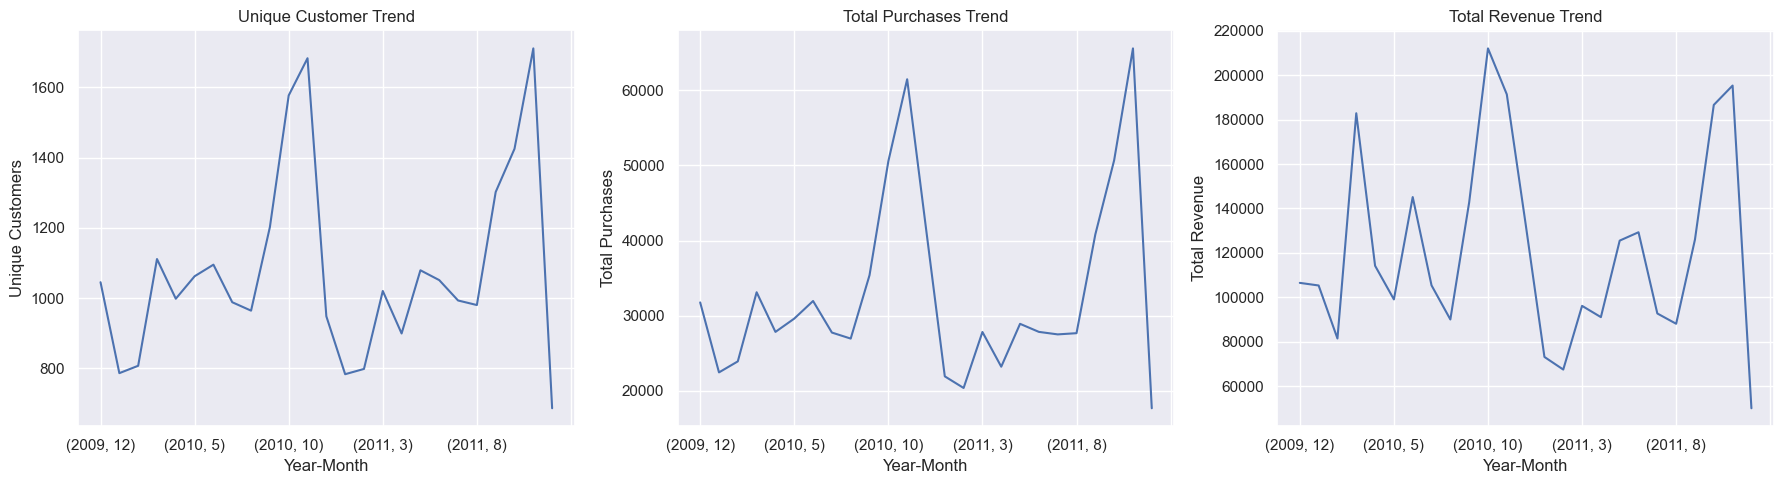

In [26]:
rfm_trend = df_analysis.groupby(['Year', 'Month']).agg({
    'Customer ID': pd.Series.nunique,
    'Invoice': 'count',
    'Price': 'sum'
}).reset_index()

rfm_trend.rename(columns={'Customer ID': 'Unique Customers', 'Invoice': 'Total Purchases', 'Price': 'Total Revenue'}, inplace=True)

rfm_pivot = rfm_trend.pivot_table(index=['Year', 'Month'], values=['Unique Customers', 'Total Purchases', 'Total Revenue'])
plt.figure(figsize=(18, 5))

# Unique Customers Trend
plt.subplot(1, 3, 1)
rfm_pivot['Unique Customers'].plot()
plt.title('Unique Customer Trend')
plt.xlabel('Year-Month')
plt.ylabel('Unique Customers')

# Total Purchases Trend
plt.subplot(1, 3, 2)
rfm_pivot['Total Purchases'].plot()
plt.title('Total Purchases Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Purchases')

# Total Revenue Trend
plt.subplot(1, 3, 3)
rfm_pivot['Total Revenue'].plot()
plt.title('Total Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()



1. **Unique Customer Trend**:
   - There's a noticeable peak around May 2010, after which the number of unique customers declines sharply.
   - A similar but smaller peak occurs around August 2011.
   - The lowest point seems to be around December 2009, and there's a general growth trend in unique customers from that point until May 2010.
   - After the peak in May 2010, there's a decline followed by a period of relative stability with minor fluctuations.

2. **Total Purchases Trend**:
   - Just like the unique customer trend, there's a sharp peak around May 2010, which is then followed by a steep decline.
   - There's also another peak around August 2011, though it's not as pronounced as the first one.
   - The trend between these two peaks shows a stable period with slight growth.

3. **Total Revenue Trend**:
   - The revenue trend is more volatile compared to the other two.
   - There are multiple peaks and valleys. The peaks occur around December 2009, May 2010, and August 2011. These peaks align well with the peaks in the other two graphs.
   - Interestingly, while the unique customers and total purchases show a decline post-May 2010, the total revenue doesn't drop as sharply. This could indicate that while fewer customers were making purchases, the average transaction value might have been higher.
   - The period post-August 2011 indicates a decline in revenue, which seems to stabilize towards the end of the graph.

**Analysis**:
- The peaks in May 2010 and August 2011 across all three graphs suggest that there might have been some marketing campaigns, events, or external factors that drove higher engagement during those times.
- Post the peak in May 2010, even though the number of unique customers and total purchases declined, the revenue didn't drop as drastically. This might be due to higher transaction values or selling more premium products/services during that period.
- It would be beneficial to understand external and internal business activities during these peak times to gain a better understanding of what drove the spikes and how they can potentially be replicated in the future.

In [27]:
segt_map = {
    r'[1-2][1-2][1-2]': 'Hibernating',
    r'[1-2][1-2][3-4]': 'At Risk',
    r'[1-2][3-4][1-2]': 'Can’t Lose Them',
    r'[1-2][3-4][3-4]': 'About To Sleep',
    r'[3-4][1-2][1-2]': 'Lost Cheap Customers',
    r'[3-4][1-2][3-4]': 'Lost Customers',
    r'[3-4][3-4][1-2]': 'Potential Loyalist',
    r'[3-4][3-4][3-4]': 'Champions'
}

rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segment_counts


Lost Customers            98
Can’t Lose Them          136
Potential Loyalist       143
At Risk                  196
About To Sleep           789
Lost Cheap Customers     848
Hibernating             1844
Champions               1888
Name: Segment, dtype: int64

1. **Top Customers (Champions)**: These customers have the highest RFM scores and are frequent, recent buyers with a high monetary value. They are likely to respond well to upselling and cross-selling opportunities.
2. **Loyal Customers**: Customers with high frequency but potentially lower recency and/or monetary scores. They buy often and are engaged with the brand.
3. **Potential Loyalist**: These are customers with a high monetary score and a good frequency but might not have shopped recently.
4. **Recent Customers**: Customers with high recency scores but lower frequency and monetary values. They are new customers that have the potential to become repeat buyers.
5. **At Risk**: Customers who have spent a lot and shopped often but haven't returned for a long time.
6. **Can’t Lose Them**: Once loyal and high-spending customers who haven’t made purchases in a long time.
7. **Hibernating**: Low recency, frequency, and monetary scores, indicating customers who used to shop but haven't engaged in a long time.
8. **Lost Customers**: The lowest RFM scores across all three dimensions. They are unlikely to return and may not be worth investing in reactivation efforts.

- **Champions**: 1888 customers
- **Hibernating**: 1844 customers
- **Lost Cheap Customers**: 848 customers
- **About To Sleep**: 789 customers
- **At Risk**: 196 customers
- **Potential Loyalist**: 143 customers
- **Can’t Lose Them**: 136 customers
- **Lost Customers**: 98 customers


## Analysis

- Offer exclusive promotions to "Champions" to reward their loyalty and encourage further engagement.
- Send loyalty programs or feedback requests to "Potential Loyalists" to increase their engagement and move them towards becoming "Champions".
- Create re-engagement campaigns for "At Risk" and "Can’t Lose Them" segments to encourage them to make another purchase.
- Approach "Hibernating" customers with special comeback deals or information on what's new since they last purchased.


In [28]:
# Identify returned transactions
returns_invoices = df_analysis[df_analysis['Invoice'].astype(str).str.contains('C')]
customer_return_rates = returns_invoices.groupby('Customer ID').size() / df_analysis.groupby('Customer ID').size()
customer_return_rates_df = customer_return_rates.reset_index().rename(columns={0: 'Return Rate'})
rfm_with_returns = rfm.merge(customer_return_rates_df, on='Customer ID', how='left')
rfm_with_returns['Return Rate'].fillna(0, inplace=True)
segment_profiles = rfm_with_returns.groupby('Segment').agg({
    'MonetaryValue': 'mean',
    'Frequency': 'mean',
    'Return Rate': 'mean'
}).reset_index()
segment_profiles



Segment  MonetaryValue   Frequency  Return Rate
0        About To Sleep     547.390540  157.485425     0.023883
1               At Risk    1506.276173   32.285714     0.204524
2       Can’t Lose Them     139.747206   67.213235     0.016268
3             Champions    1088.344818  324.363877     0.024519
4           Hibernating      62.923477   19.787419     0.046673
5  Lost Cheap Customers      71.537219   24.949292     0.024114
6        Lost Customers     343.363990   41.836735     0.036041
7    Potential Loyalist     138.148112   73.391608     0.012119

1. **About To Sleep**: These customers have a moderate average monetary value and a high purchase frequency but have not purchased recently. The return rate is relatively low. Strategies for this group could focus on re-engagement campaigns to remind them of the brand and encourage them to return.

2. **At Risk**: This segment has a high average monetary value but a low purchase frequency and a significantly high return rate. These customers have spent a lot but are not purchasing frequently and when they do, they return items often. This could indicate dissatisfaction or issues with the products. It would be crucial to reach out to these customers with surveys or personalized communication to understand their issues and improve their customer experience.

3. **Can’t Lose Them**: Customers in this segment have a low average monetary value and an above-average frequency. The return rate is low, which suggests they are satisfied with their purchases. They might be buying less expensive items but doing so regularly. It would be beneficial to try to upsell or cross-sell to increase their average spend.

4. **Champions**: These are your best customers with high monetary value and high purchase frequency. They also have a low return rate, which indicates strong satisfaction with their purchases. Maintaining a good relationship with these customers is essential, and they could be targeted with loyalty programs, exclusive offers, or early access to new products.

5. **Hibernating**: These customers have the lowest average monetary value and frequency, and a relatively high return rate. They may be infrequent shoppers who are not highly engaged with the brand. Tailored promotions or feedback requests might be ways to revive interest among these customers.

6. **Lost Cheap Customers**: This segment has a low monetary value, low frequency, and low return rate. They have not spent much and do not purchase often. It might not be cost-effective to invest heavily in re-engaging this segment, but periodic low-cost promotions could be used to entice them back.

7. **Lost Customers**: With a moderate average monetary value and frequency, these customers have stopped purchasing recently. The return rate is higher than average, suggesting potential issues with product satisfaction. It might be worthwhile to investigate why these customers have stopped purchasing and address any service or product issues.

8. **Potential Loyalist**: This segment has a moderate average monetary value and high frequency. They have a very low return rate, which suggests they are recent customers who are happy with their purchases. These customers show the potential to become high-value customers, and efforts should be made to nurture these relationships through personalized marketing, recommendations, and loyalty programs.

Overall, each segment requires a different marketing and customer service strategy. High-value segments like Champions and Potential Loyalist should be the focus for retention and loyalty programs, while "At Risk" customers need attention to understand their dissatisfaction. For Hibernating and Lost segments, reactivation strategies are needed, possibly through re-engagement campaigns and feedback solicitation to identify any service or product improvement opportunities.

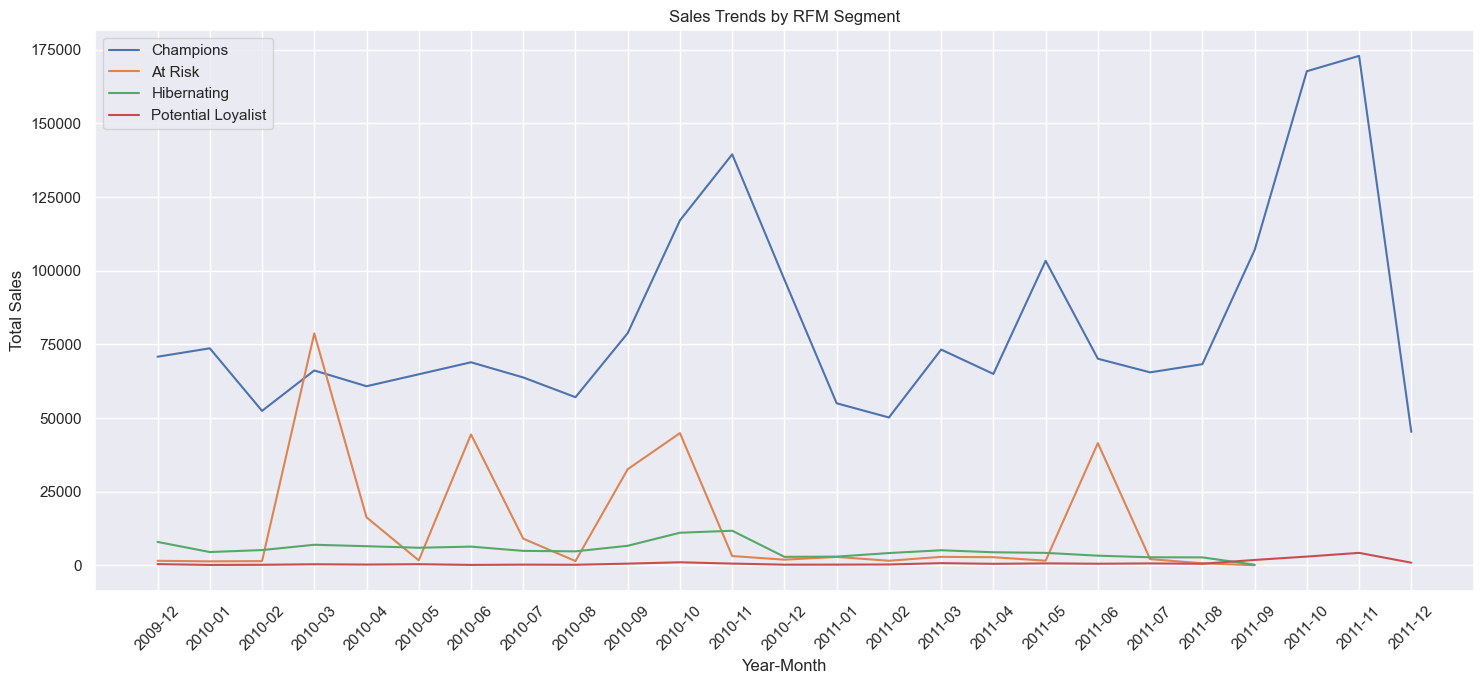

In [29]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['Segment'] = rfm['RFM_Segment'].replace(segt_map, regex=True)

df_analysis_with_segment = df_analysis.merge(rfm[['Customer ID', 'Segment']], on='Customer ID', how='left')

df_analysis_with_segment['YearMonth'] = df_analysis_with_segment['InvoiceDate'].dt.to_period('M')

time_series_data = df_analysis_with_segment.groupby(['YearMonth', 'Segment']).agg({
    'Price': 'sum',  
    'Invoice': 'nunique', 
    'Customer ID': 'nunique' 
}).reset_index()

time_series_pivot = time_series_data.pivot_table(index='YearMonth', columns='Segment', values='Price')

segments_to_plot = ['Champions', 'At Risk', 'Hibernating', 'Potential Loyalist']
time_series_pivot = time_series_pivot[segments_to_plot]

plt.figure(figsize=(15, 7))
for segment in segments_to_plot:
    plt.plot(time_series_pivot.index.astype(str), time_series_pivot[segment], label=segment)

plt.title('Sales Trends by RFM Segment')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()





1. **Champions (Blue Line)**:
   - The "Champions" segment consistently drives the highest sales throughout the entire time frame.
   - There are major peaks in sales around early 2010, mid-2011, and late 2021.
   - The most significant peak occurs around late 2021, with a sharp decline right after.
   - There are periods of relative stability, particularly between early 2011 and mid-2011 and from early 2014 to mid-2014.

2. **At Risk (Orange Line)**:
   - This segment has periodic spikes in sales, notably around early 2010, mid-2011, and mid-2013.
   - Post-mid-2013, sales from the "At Risk" segment have significantly declined and have remained low.

3. **Hibernating (Green Line)**:
   - Sales from the "Hibernating" segment are relatively consistent but at a much lower volume compared to the other segments.
   - There's a slight increase in sales around mid-2011 and mid-2013 but then returns to a low baseline.

4. **Potential Loyalist (Red Line)**:
   - This segment has the lowest sales across the time frame.
   - There's a minor peak around mid-2013, but sales have remained flat for the most part.

**General Observations**:
- **Volatility**: The "Champions" segment, despite its high sales, shows volatility with sharp peaks and valleys, suggesting potential seasonal trends or impacts from promotional campaigns.
- **Decline in At Risk**: The sales from the "At Risk" segment, which showed promise with intermittent peaks, has seen a decline post-mid-2013, suggesting a possible loss of engagement or change in buying behavior among this segment.
- **Consistency in Hibernating & Potential Loyalist**: These segments are relatively consistent in their sales trends, albeit at lower volumes. Efforts could be made to re-engage or upsell to these segments to tap into their potential.
- **Alignment of Peaks**: The peaks in sales across the segments align well, especially around early 2010, mid-2011, and mid-2013. This alignment suggests that external factors like marketing campaigns or seasonality might have influenced sales across all segments during these times.

In conclusion, while the Champions segment drives the most sales, there's room to engage the other segments better, especially the At Risk segment, which has shown potential in the past. It would be beneficial to explore strategies to re-engage the At Risk and Hibernating segments while maintaining the loyalty of the Champions segment.

In [30]:
summary = df_analysis.groupby('Customer ID').agg({
    'Invoice': 'nunique',  # Frequency
    'InvoiceDate': ['min', 'max'],
    'Price': 'sum'  # Total monetary value
}).reset_index()

summary.columns = ['Customer ID', 'Frequency', 'FirstPurchase', 'LastPurchase', 'MonetaryValue']

summary['Recency'] = (summary['LastPurchase'] - summary['FirstPurchase']).dt.days
summary['T'] = (snapshot_date - summary['FirstPurchase']).dt.days

summary['Frequency'] -= 1

summary = summary[summary['Frequency'] > 0]
summary['AverageValue'] = summary['MonetaryValue'] / summary['Frequency']

correlation = summary[['Frequency', 'AverageValue']].corr().iloc[0, 1]

correlation, summary[['Frequency', 'AverageValue']].head()


(-0.032437925318277924,
    Frequency  AverageValue
 0         16     36.277500
 1          7     92.022857
 2          4     48.275000
 3          4    376.147500
 6         12    188.808333)

The correlation between frequency and average monetary value is approximately 
−0.0324, which is very close to zero. This suggests that there is no significant relationship between the two variables, thus fulfilling the independence assumption required for the Gamma-Gamma model.

In [32]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


                frequency  monetary_value
frequency        1.000000        0.003462
monetary_value   0.003462        1.000000
   Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0       56.694000   
1      12347.0        7.0    402.0  404.0       81.542857   
2      12348.0        4.0    363.0  438.0       44.677500   
3      12349.0        4.0    717.0  735.0      370.110000   
6      12352.0        8.0    356.0  392.0      281.656250   

   predicted_purchases  predicted_average_value          CLV  
0             0.002585                59.216949   328.606982  
1             0.016582                78.150720  2653.324904  
2             0.009007                54.217676  1010.454677  
3             0.005764               251.850183  3133.417102  
6             0.018978               229.691009  8895.250549  


In [152]:
new_summary=summary.reset_index()

In [153]:
new_summary=new_summary[['Customer ID','frequency','recency','T','monetary_value']]

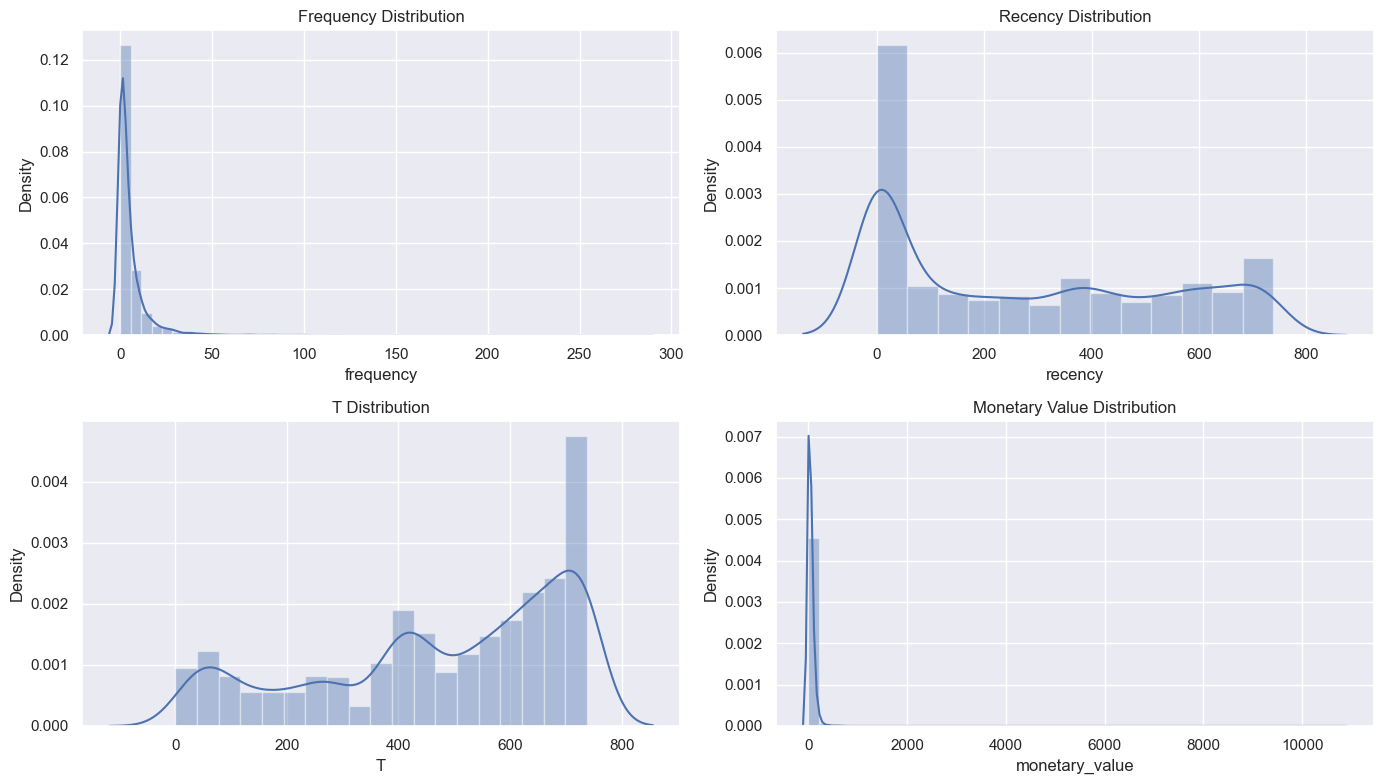

In [154]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(new_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(new_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(new_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(new_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

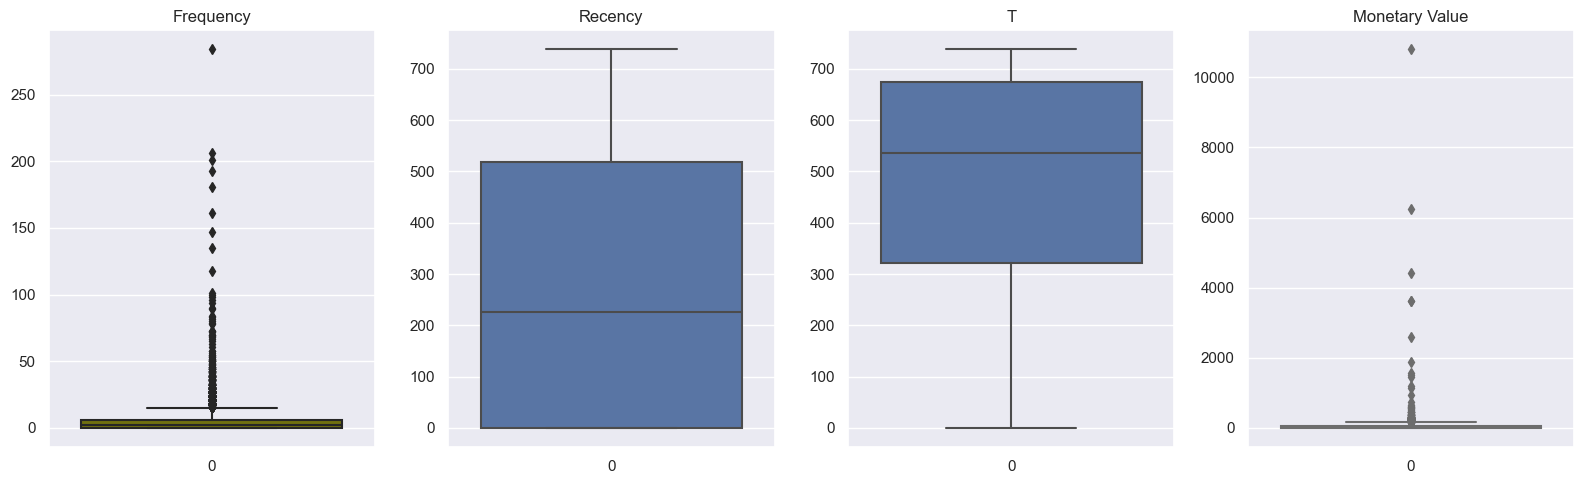

In [155]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(new_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(new_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(new_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(new_summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [156]:
new_summary.describe()

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384       52.893133
std     1715.451981    11.293673   259.830840   223.879537      200.343991
min    12346.000000     0.000000     0.000000     0.000000        0.000000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000       30.698750
75%    16801.750000     6.000000   518.000000   674.000000       66.225357
max    18287.000000   284.000000   738.000000   738.000000    10796.840000

In [157]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.668170  0.015453         0.637882         0.698458
alpha  49.943472  1.517728        46.968725        52.918220
a       0.145498  0.014512         0.117055         0.173941
b       2.112726  0.313787         1.497704         2.727749

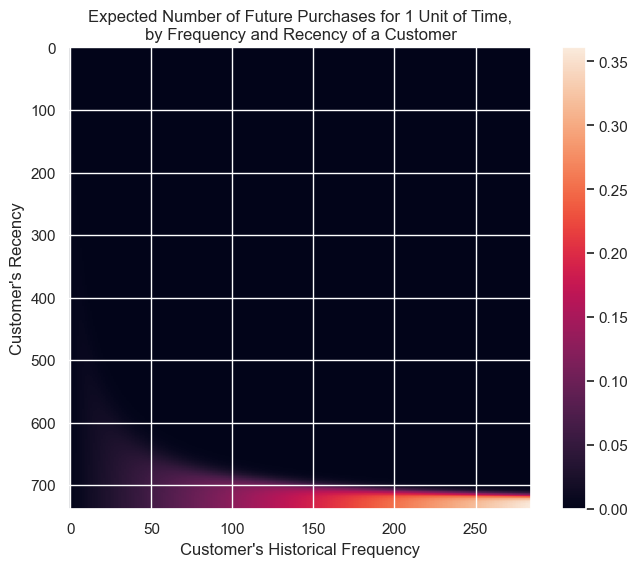

In [158]:
plt.figure(figsize=(8, 6))
plot_frequency_recency_matrix(bgf)
plt.show()


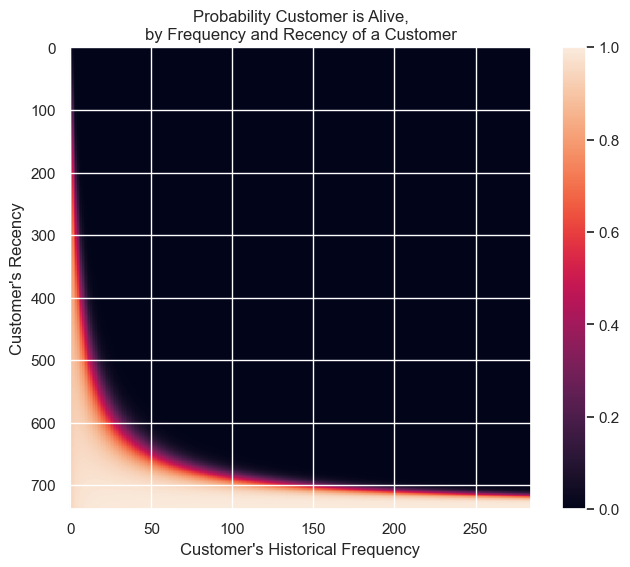

In [159]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(bgf)
plt.show()

In [160]:
t = 180  # The number of time units (days, weeks, etc.) you want to predict into the future
summary_bgf['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf['frequency'], summary_bgf['recency'], summary_bgf['T'])

In [161]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  \
2260      14606.0      181.0    735.0  736.0      104.839779   
5495      17841.0      193.0    736.0  737.0      184.638342   
2965      15311.0      201.0    738.0  738.0       62.738507   
402       12748.0      206.0    735.0  735.0      124.819854   
2565      14911.0      284.0    737.0  738.0      250.825951   

      predicted_purchases  predicted_average_value            CLV  
2260            40.927970               104.334408   51559.770077  
5495            43.578764               183.108647   96356.316649  
2965            45.332886                62.817690   34389.620051  
402             46.632594               124.127287   69882.513913  
2565            63.988828               249.184597  192544.518870

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

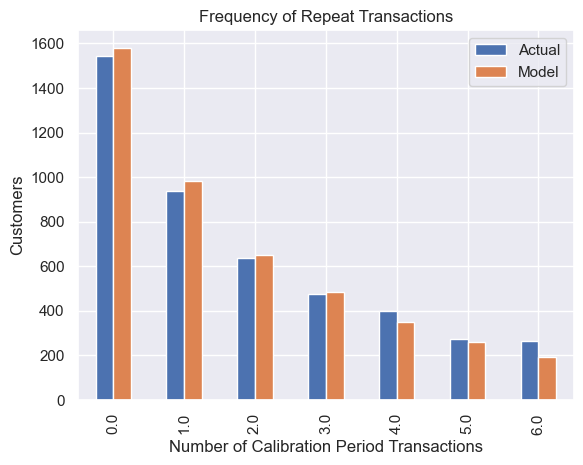

In [162]:
plot_period_transactions(bgf)

In [163]:
#dividing our dataset into training & holdout
bgf_summary_cal_holdout = calibration_and_holdout_data(df, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [164]:
bgf.fit(bgf_summary_cal_holdout['frequency_cal'],
        bgf_summary_cal_holdout['recency_cal'],
        bgf_summary_cal_holdout['T_cal'])


<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

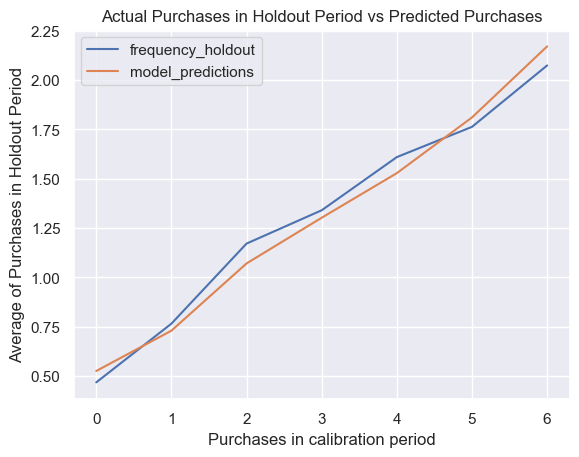

In [165]:
plot_calibration_purchases_vs_holdout_purchases(bgf, bgf_summary_cal_holdout)
plt.show() 


<Axes: title={'center': 'History of P_alive'}, ylabel='P_alive'>

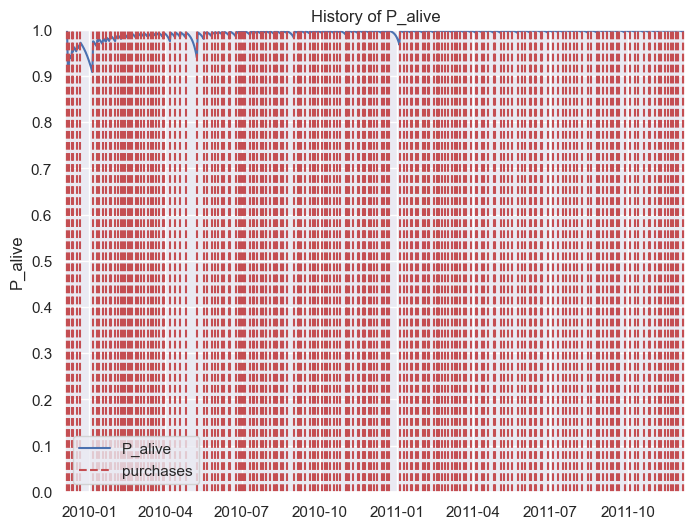

In [166]:
id_1 = 14606.0
days_since_birth = 365
sp_trans_1 = df[df["Customer ID"] == id_1]
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_1, "InvoiceDate")

In [167]:
summary_bgf["actual_180"] = summary_bgf["frequency"]/summary_bgf["recency"]*180
summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0
summary_bgf["Error"] = summary_bgf["actual_180"] - summary_bgf["predicted_purchases"]
mse = mean_squared_error(summary_bgf["actual_180"],summary_bgf["predicted_purchases"])
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))
bgf_mse_purchase_180 = mean_squared_error(summary_bgf["actual_180"],summary_bgf["predicted_purchases"])
bgf_rmse_purchase_180 = sqrt(bgf_mse_purchase_180)
bgf_avg_error_purchase_180 = summary_bgf["Error"].mean()

Mean Squared Error: 211.2962444705141
Average Error:  3.5701427415777234
Root Mean Squared Error: 14.536032624843482


<Axes: >

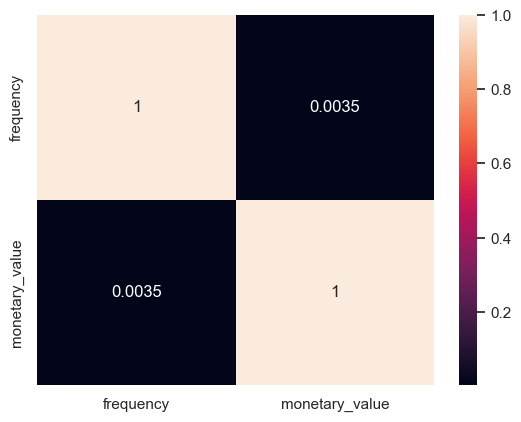

In [168]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]
final_summary = res_summary[res_summary["monetary_value"] > 0]
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [169]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    0.704926   0.025317         0.655305         0.754548
q    2.823376   0.109760         2.608246         3.038506
v  178.401165  13.268353       152.395194       204.407136

In [170]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 70.15241350641615
Actual Average Sales: 71.46225427083971
Difference: 1.309840764423555
Mean Squared Error: 20141.45360249402
Root Mean Squared Error: 141.92058907182573


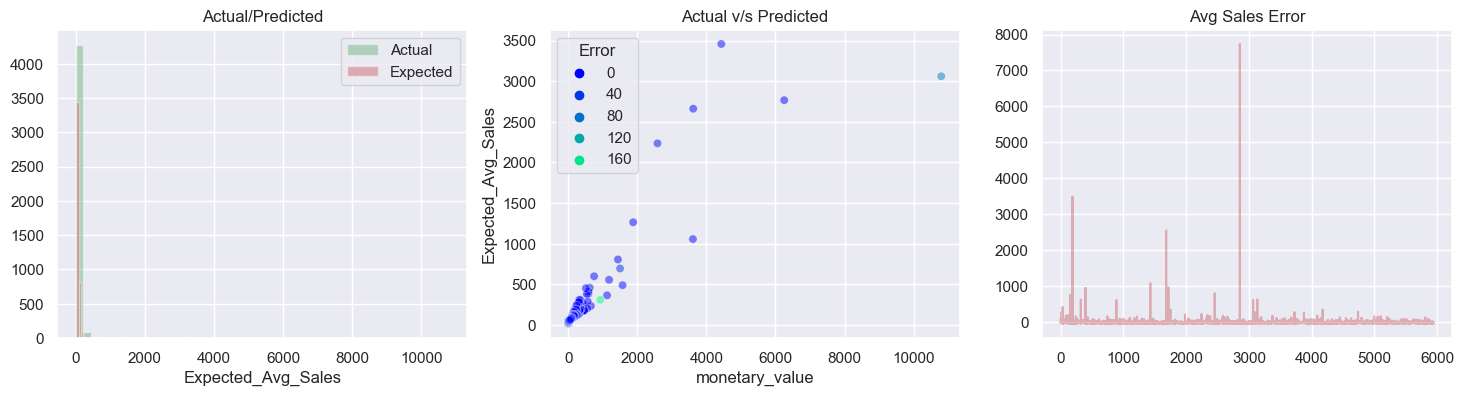

In [171]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_["monetary_value"], color = "g", kde = False)
sns.distplot(summary_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(data = summary_, x= "monetary_value", y= "Expected_Avg_Sales", alpha = 0.5, hue = summary_["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_["monetary_value"]-summary_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [172]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,summary_["frequency"],summary_["recency"],
                                                       summary_["T"],summary_["monetary_value"],time = 180,
                                                       freq = 'D',discount_rate = 0.01)
summary_["CLV"] = summary_["predicted_clv"]*0.05
summary_[summary_["Customer ID"] == 13902.0]
summary_.sort_values(by = "Error", ascending = False)

actual = summary_["monetary_value"]*summary_["actual_180"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))


Average Error: 425.93927511904377
Mean Squared Error: 222589982.5782459
Root Mean Squared Error: 14919.449808161355


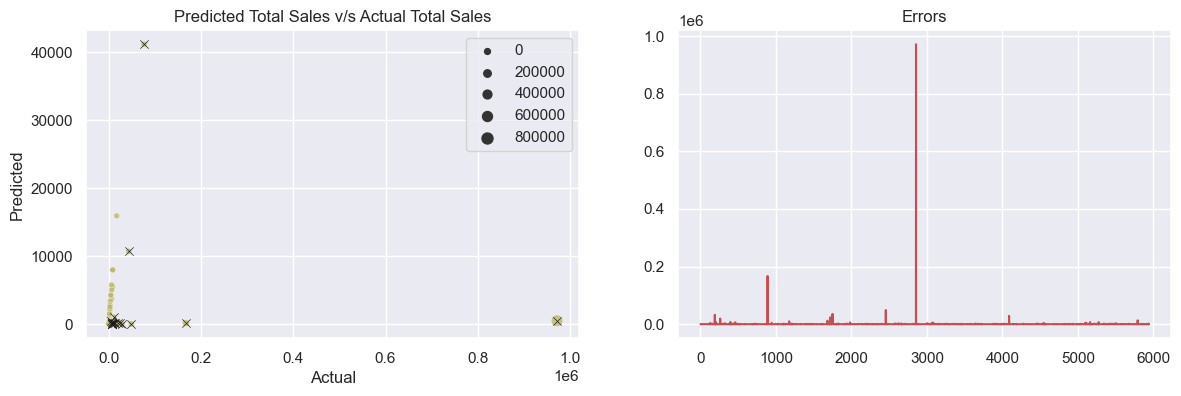

In [173]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(data = result, x = 'Actual', y= 'Predicted', size = result["Error"], color = "darkkhaki", alpha = 0.8, marker = 'o')
df_sc= result[result["Error"] > 5000]
sns.scatterplot(data = df_sc, x= 'Actual', y= "Predicted", color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

### Pareto NBD Model

In [174]:
summary_pnbd = summary.copy()
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.88, beta: 124.23, r: 0.83, s: 0.16>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

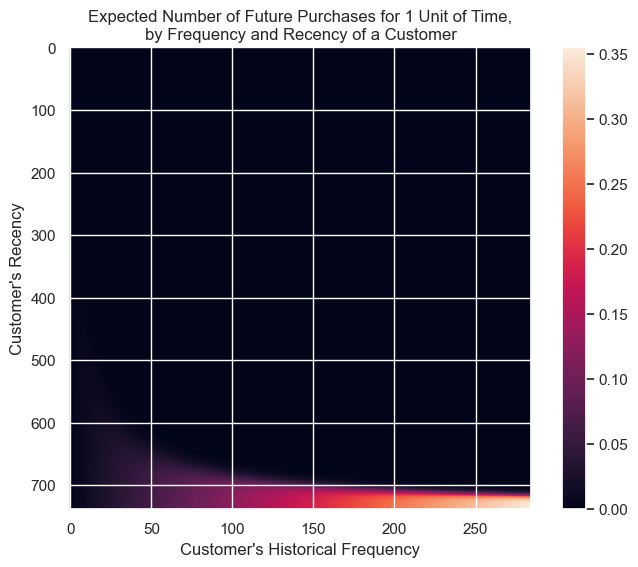

In [175]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(pareto_nbd)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

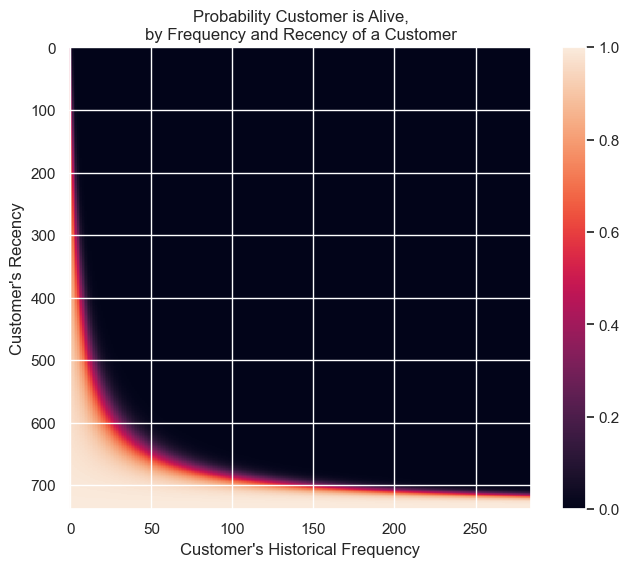

In [176]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(pareto_nbd)

In [177]:
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [178]:
t = 180
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [179]:
summary_pnbd.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
2260      14606.0      181.0    735.0  736.0      104.839779     0.000215   
5495      17841.0      193.0    736.0  737.0      184.638342     0.000216   
2965      15311.0      201.0    738.0  738.0       62.738507     0.000000   
402       12748.0      206.0    735.0  735.0      124.819854     0.000000   
2565      14911.0      284.0    737.0  738.0      250.825951     0.000229   

       p_alive  predicted_purchases  
2260  0.999785            40.257462  
5495  0.999784            42.861319  
2965  1.000000            44.585065  
402   1.000000            45.858729  
2565  0.999771            62.905249

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

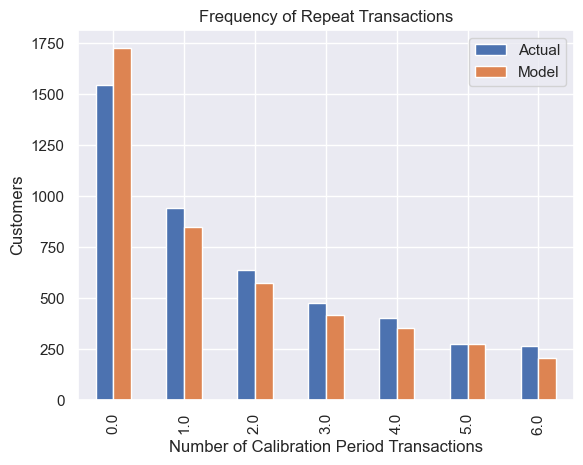

In [180]:
plot_period_transactions(pareto_nbd)

In [181]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(df, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [182]:
pareto_summary_cal_holdout.head()


frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [183]:
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.65, beta: 1209.32, r: 0.82, s: 1.08>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

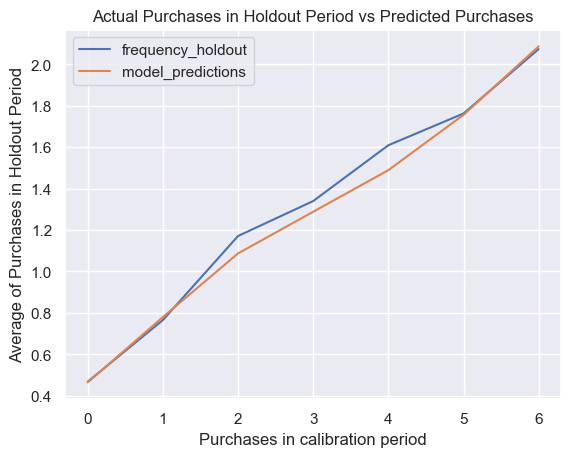

In [184]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, pareto_summary_cal_holdout)

In [186]:
summary_pnbd["actual_180_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*180
summary_pnbd["actual_180_p"].fillna(0, inplace = True)
summary_pnbd["p_error"] = summary_pnbd["actual_180_p"]-summary_pnbd["predicted_purchases"]


In [187]:
print("Mean Squared Error: %s" % mean_squared_error(summary_pnbd["actual_180_p"], summary_pnbd["predicted_purchases"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_pnbd["actual_180_p"], summary_pnbd["predicted_purchases"])))
print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))

Mean Squared Error: 156.40558736907104
Root Mean Squared Error: 12.506221946258233
Average Purchase Error: 2.5161325277439297


In [188]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_180_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_180_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

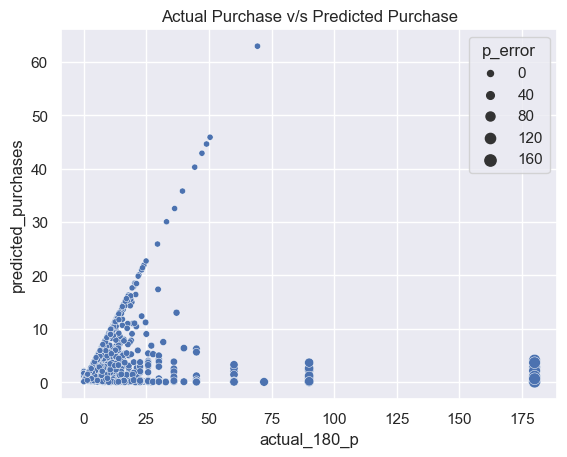

In [189]:
sns.scatterplot(data = summary_pnbd, x ="actual_180_p", y= "predicted_purchases", size = "p_error")
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [190]:
summary_pnbd

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0         12346.0       10.0    400.0  725.0       56.694000     0.819926   
1         12347.0        7.0    402.0  404.0       81.542857     0.000634   
2         12348.0        4.0    363.0  438.0       44.677500     0.034902   
3         12349.0        4.0    717.0  735.0      370.110000     0.003675   
4         12350.0        0.0      0.0  310.0        0.000000     0.334811   
...           ...        ...      ...    ...             ...          ...   
5937      18283.0       18.0    655.0  658.0       90.841667     0.000657   
5938      18284.0        1.0      2.0  431.0       25.000000     0.730154   
5939      18285.0        0.0      0.0  660.0        0.000000     0.523672   
5940      18286.0        2.0    247.0  723.0       85.425000     0.417612   
5941      18287.0        6.0    696.0  738.0       57.723333     0.009873   

       p_alive  predicted_purchases  actual_180_p    p_error  
0     0.180074             0.437987      4.500000   4.062013  
1     0.999366             2.937253      3.134328   0.197076  
2     0.965098             1.634077      1.983471   0.349394  
3     0.996325             1.068002      1.004184  -0.063818  
4     0.665189             0.259410      0.000000  -0.259410  
...        ...                  ...           ...        ...  
5937  0.999343             4.611565      4.946565   0.335000  
5938  0.269846             0.175792     90.000000  89.824208  
5939  0.476328             0.097150      0.000000  -0.097150  
5940  0.582388             0.371538      1.457490   1.085952  
5941  0.990127             1.494878      1.551724   0.056846  

[5942 rows x 10 columns]

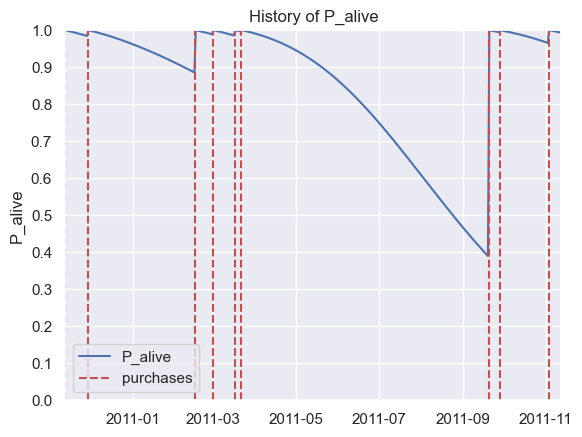

In [191]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, df, id_):
    
    individual_alive =df[df["Customer ID"] == id_]
    plot_history_alive(pareto_nbd, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")
get_history_alive(365, df, 12352.0)

<Axes: >

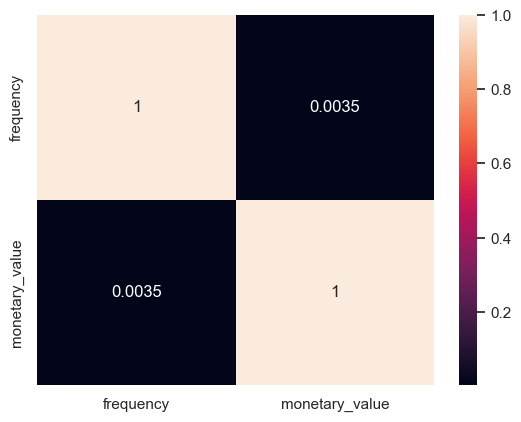

In [192]:
summary_pnbd_copy = summary_pnbd.copy()
summary_pnbd_copy = summary_pnbd_copy[(summary_pnbd_copy["frequency"] > 0) & (summary_pnbd_copy["monetary_value"] > 0)]
sns.heatmap(summary_pnbd_copy[["frequency", "monetary_value"]].corr(), annot = True)

In [193]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)
ggf_p.fit(summary_pnbd_copy["frequency"], summary_pnbd_copy["monetary_value"])
ggf_p.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    0.704926   0.025317         0.655305         0.754548
q    2.823376   0.109760         2.608246         3.038506
v  178.401165  13.268353       152.395194       204.407136

In [194]:
summary_pnbd_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_pnbd_copy["frequency"],
                                                                        summary_pnbd_copy["monetary_value"])
summary_pnbd_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0       56.694000     0.819926   
1      12347.0        7.0    402.0  404.0       81.542857     0.000634   
2      12348.0        4.0    363.0  438.0       44.677500     0.034902   
3      12349.0        4.0    717.0  735.0      370.110000     0.003675   
6      12352.0        8.0    356.0  392.0      281.656250     0.017284   

    p_alive  predicted_purchases  actual_180_p   p_error  expected_avg_sales_p  
0  0.180074             0.437987      4.500000  4.062013             59.216949  
1  0.999366             2.937253      3.134328  0.197076             78.150720  
2  0.965098             1.634077      1.983471  0.349394             54.217676  
3  0.996325             1.068002      1.004184 -0.063818            251.850183  
6  0.982716             3.340938      4.044944  0.704005            229.691009

In [195]:
avg_purchase_error = summary_pnbd_copy["monetary_value"].mean() - summary_pnbd_copy["expected_avg_sales_p"].mean()
print("Acutal Avg Sales: %s" % summary_pnbd_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_pnbd_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_pnbd_copy["monetary_value"], summary_pnbd_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_pnbd_copy["monetary_value"], summary_pnbd_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 71.46225427083971
Predicted Avg Sales: 70.15241350641615
Mean Sqaured Error: 20141.45360249402
Root Mean Sqaured Error: 141.92058907182573
Avg Sales Error: 1.309840764423555


In [197]:
actual = summary_pnbd_copy["actual_180_p"] * summary_pnbd_copy["monetary_value"]
predicted = summary_pnbd_copy["predicted_purchases"] * summary_pnbd_copy["expected_avg_sales_p"]
error = actual-predicted
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 425.68540968783765
Mean Squared Error: 222605099.60223842
Root Mean Squared Error: 14919.956420922897


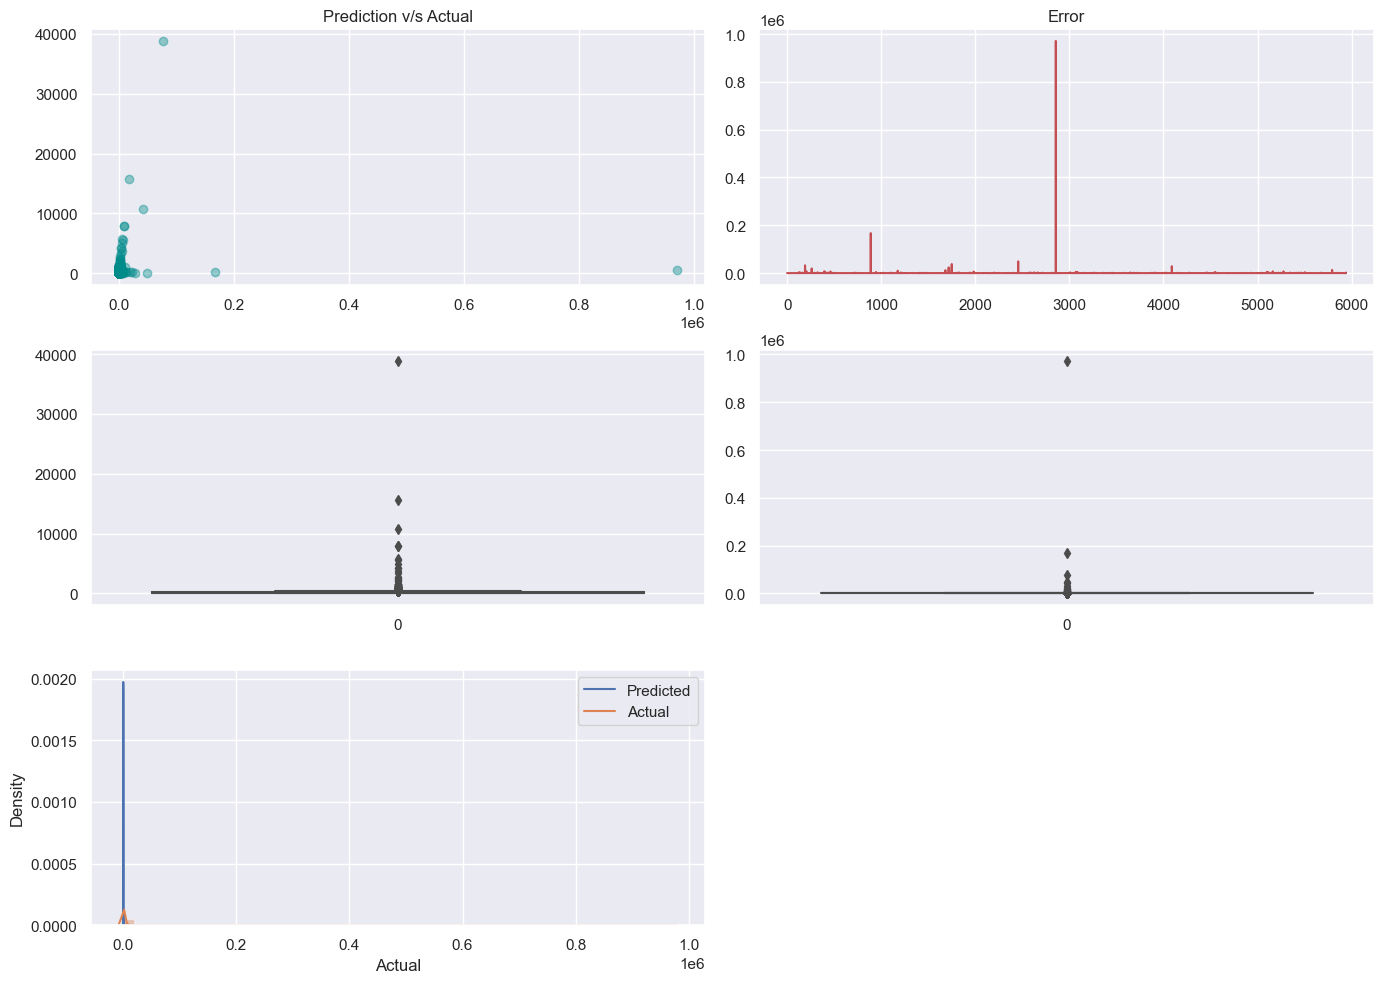

In [198]:
plt.figure(figsize=(14,10))
plt.subplot(321)
plt.errorbar(result_p["Actual"], result_p["Predicted"], fmt='o', color='darkcyan',
             ecolor='black', elinewidth=2, capsize=0, alpha = 0.4);
plt.title("Prediction v/s Actual")
plt.subplot(322)
plt.plot(result_p["Error"], color = 'r')
plt.title("Error")
plt.subplot(323)
sns.boxplot(result_p["Predicted"])
plt.subplot(324)
sns.boxplot(result_p["Actual"])
plt.subplot(325)
sns.distplot(result_p["Predicted"])
sns.distplot(result_p["Actual"])
plt.legend(["Predicted", "Actual"])
plt.tight_layout()

In [199]:
summary_pnbd_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_pnbd_copy["frequency"],
                                                       summary_pnbd_copy["recency"],
                                                       summary_pnbd_copy["T"],
                                                       summary_pnbd_copy["monetary_value"],
                                                       time = 180,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [200]:
summary_pnbd_copy["CLV_p"] = summary_pnbd_copy["predicted_clv_p"]*0.05
summary_pnbd_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
0      12346.0       10.0    400.0  725.0       56.694000     0.819926   
1      12347.0        7.0    402.0  404.0       81.542857     0.000634   
2      12348.0        4.0    363.0  438.0       44.677500     0.034902   
3      12349.0        4.0    717.0  735.0      370.110000     0.003675   
6      12352.0        8.0    356.0  392.0      281.656250     0.017284   

    p_alive  predicted_purchases  actual_180_p   p_error  \
0  0.180074             0.437987      4.500000  4.062013   
1  0.999366             2.937253      3.134328  0.197076   
2  0.965098             1.634077      1.983471  0.349394   
3  0.996325             1.068002      1.004184 -0.063818   
6  0.982716             3.340938      4.044944  0.704005   

   expected_avg_sales_p  predicted_clv_p       CLV_p  
0             59.216949        89.954046    4.497702  
1             78.150720      1668.327311   83.416366  
2             54.217676       623.017896   31.150895  
3            251.850183      2068.725394  103.436270  
6            229.691009      5466.247571  273.312379

In [201]:
summary_mbg = summary.copy()
summary_mbg.head()
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])
mbg.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.837666  0.029295         0.780247         0.895084
alpha  57.895342  1.972543        54.029159        61.761525
a       0.180562  0.015152         0.150864         0.210260
b       2.045383  0.314244         1.429466         2.661301

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

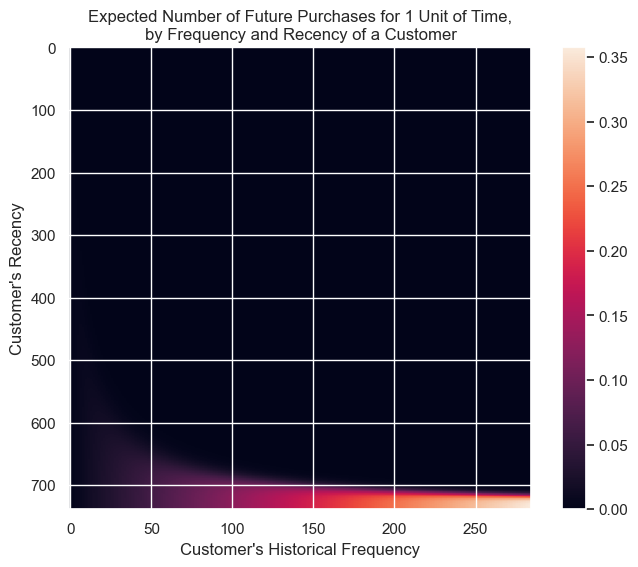

In [202]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(mbg)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

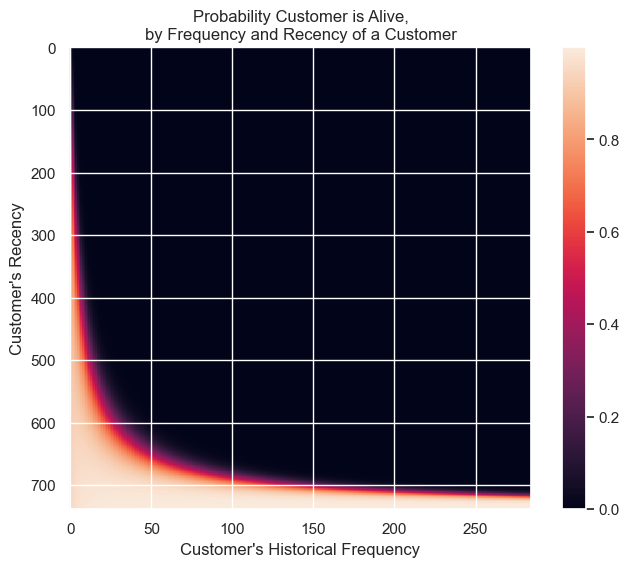

In [203]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(mbg)

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

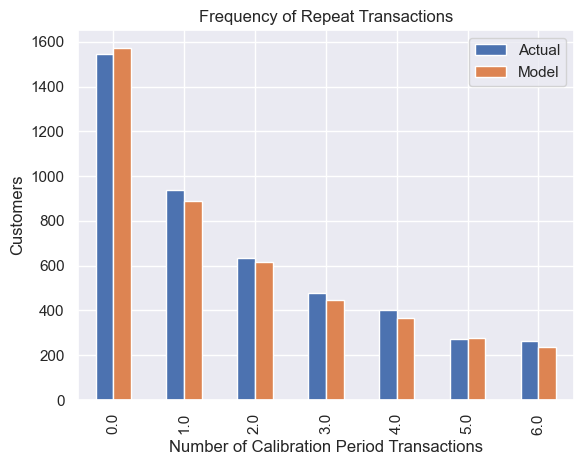

In [204]:
t = 180
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])
plot_period_transactions(mbg)


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

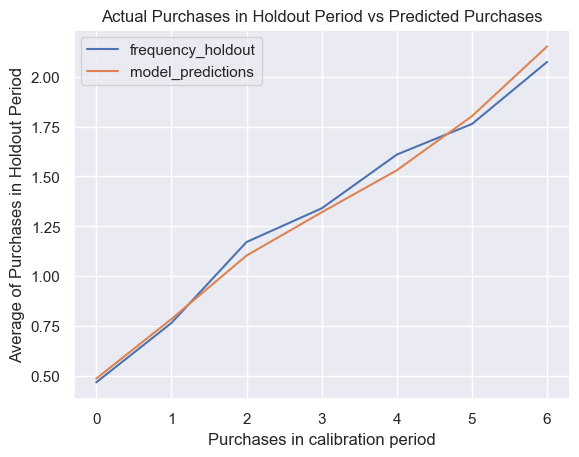

In [205]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(df, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [206]:
summary_mbg["actual_180"] = summary_mbg["frequency"]/summary_mbg["recency"]*180
summary_mbg = summary_mbg.fillna(value = 0)
summary_mbg["Error"] = summary_mbg["actual_180"] - summary_mbg["predicted_purchases"]
mse = mean_squared_error(summary_mbg["actual_180"],summary_mbg["predicted_purchases"])

In [207]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 156.93014044877586
Average Error:  2.560448647534272
Root Mean Squared Error: 12.527176076385926


In [208]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_180"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_180"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_180"].mean() - summary_mbg["predicted_purchases"].mean())

<Axes: >

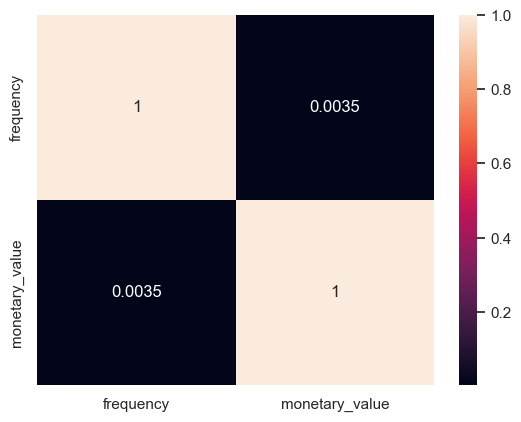

In [209]:
res_summary = summary_mbg[summary_mbg["frequency"] > 0]
final_summary = res_summary[res_summary["monetary_value"] > 0]
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [210]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    0.704926   0.025317         0.655305         0.754548
q    2.823376   0.109760         2.608246         3.038506
v  178.401165  13.268353       152.395194       204.407136

In [211]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"], 
                                                                        summary_mbg_new["monetary_value"])

In [212]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 70.15241350641615
Actual Average Sales: 71.46225427083971
Difference: 1.309840764423555
Mean Squared Error: 20141.45360249402
Root Mean Squared Error: 141.92058907182573


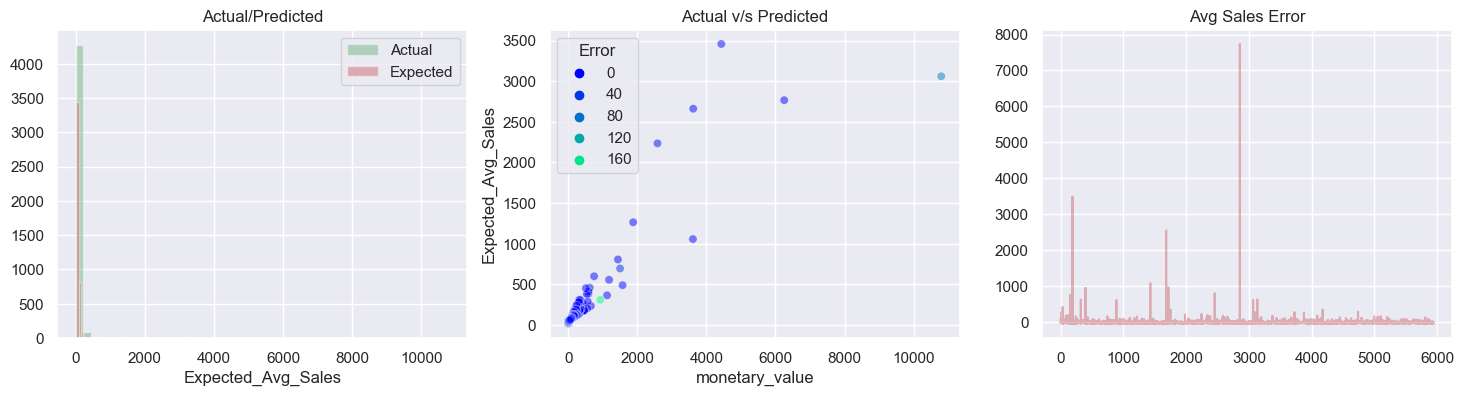

In [213]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_mbg_new["monetary_value"], color = "g", kde = False)
sns.distplot(summary_mbg_new["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(data= summary_mbg_new , x= "monetary_value", y = "Expected_Avg_Sales", alpha = 0.5, hue = summary_["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_mbg_new["monetary_value"]-summary_mbg_new["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [214]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 180,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [216]:
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*0.05
actual = summary_["monetary_value"]*summary_["actual_180"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % (mean_squared_error(result["Actual"], result["Predicted"])))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 425.93927511904377
Mean Squared Error: 222589982.5782459
Root Mean Squared Error: 14919.449808161355


In [217]:
predicted_clv_results = pd.DataFrame(summary_[["Customer ID", "predicted_clv"]])
predicted_clv_results = predicted_clv_results.merge(summary_pnbd_copy[["Customer ID", "predicted_clv_p"]], on = "Customer ID")
predicted_clv_results = predicted_clv_results.merge(summary_mbg_new[["Customer ID", "predicted_clv"]], on = "Customer ID")
predicted_clv_results.columns = ["Customer ID", "BG-NBD", "Pareto-NBD", "MBG-NBD"]
predicted_clv_results.head(5)

Customer ID       BG-NBD   Pareto-NBD      MBG-NBD
0      12346.0   224.127105    89.954046   190.754948
1      12347.0  2409.203954  1668.327311  2298.845785
2      12348.0   914.624873   623.017896   894.443814
3      12349.0  2919.167523  2068.725394  2906.013780
4      12352.0  8005.302469  5466.247571  7574.999284

In [220]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]
data = [[bgf_mse_purchase_180, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_180, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_180, pareto_avg_error_purchase, mbg_avg_purchase_error]]
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)
model_purchase_result

BG-NBD  Pareto-NBD     MBG-NBD
MSE Purchase Error   211.296244  156.405587  156.930140
RMSE Purchase Error   14.536033   12.506222   12.527176
Avg Purchase Error     3.570143    2.516133    2.560449

In [21]:
# Calculate frequency as the number of unique purchase dates per customer
frequency = df.groupby('Customer ID')['InvoiceDate'].nunique() - 1  # Subtracting 1 to account for the first purchase

# Calculate recency as the number of days between the first and the last purchase
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
last_purchase = df.groupby('Customer ID')['InvoiceDate'].max()
recency = (last_purchase - first_purchase).dt.days

# Calculate the age of the customer in the dataset (T)
T = (df['InvoiceDate'].max() - first_purchase).dt.days

# Combine all the calculated fields into a summary DataFrame
customer_summary = pd.DataFrame({
    'frequency': frequency,
    'recency': recency,
    'T': T
})

# Calculate the total spend per customer
df['TotalSpend'] = df['Quantity'] * df['Price']
monetary_value = df.groupby('Customer ID')['TotalSpend'].sum()
# Only include customers with more than one purchase for the correlation calculation
repeat_customers = customer_summary[customer_summary['frequency'] > 0].index
correlation = pd.DataFrame({
    'frequency': customer_summary.loc[repeat_customers, 'frequency'],
    'monetary_value': monetary_value[repeat_customers]
}).corr()


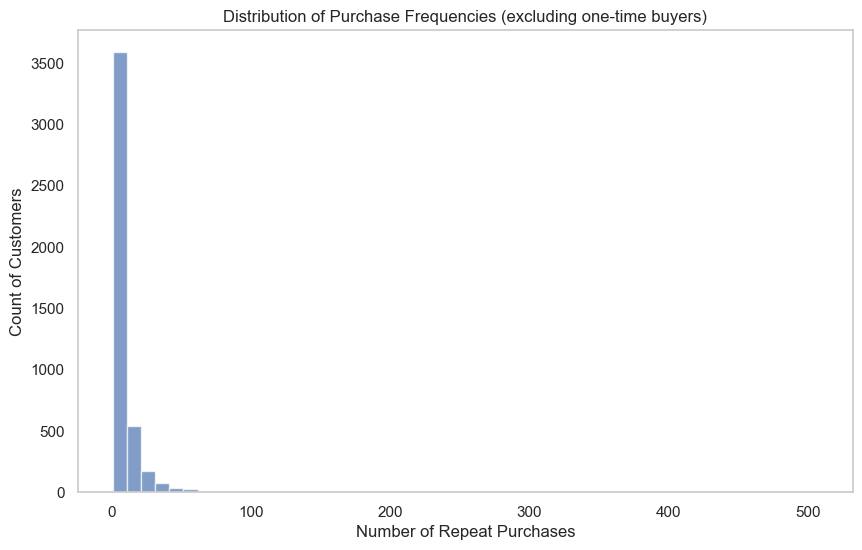

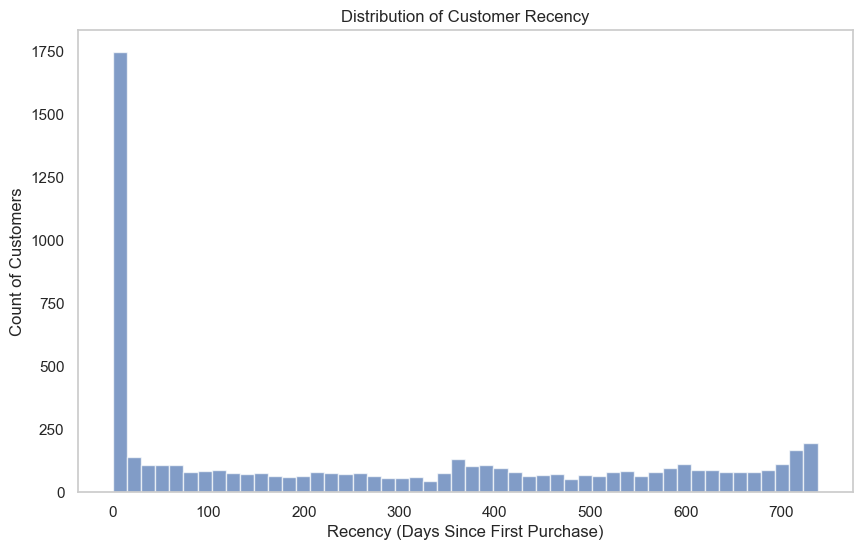

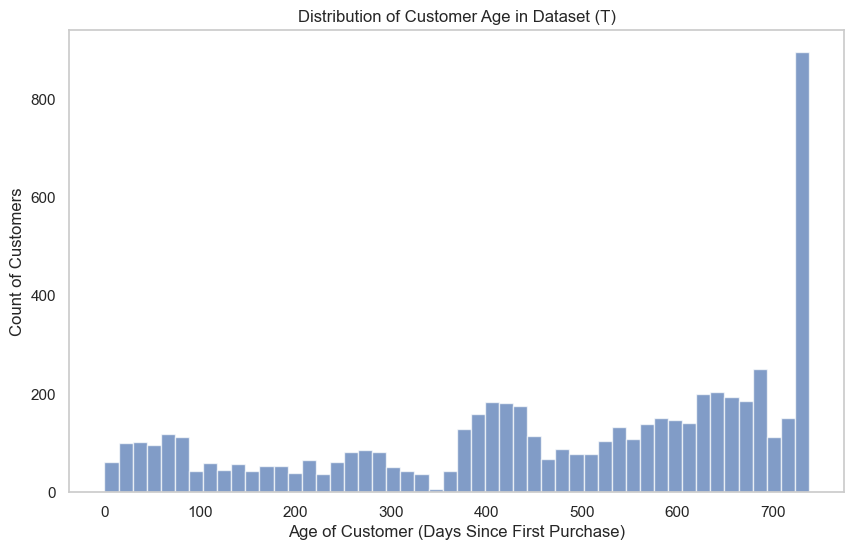

In [22]:
def plot_histogram(data, title, xlabel, ylabel, bins=50):
    plt.figure(figsize=(10, 6))
    data.hist(bins=bins, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

# Plot the distribution of customer frequencies (excluding one-time buyers)
plot_histogram(
    customer_summary[customer_summary['frequency'] > 0]['frequency'],
    'Distribution of Purchase Frequencies (excluding one-time buyers)',
    'Number of Repeat Purchases',
    'Count of Customers'
)

# Plot the distribution of customer recency
plot_histogram(
    customer_summary['recency'],
    'Distribution of Customer Recency',
    'Recency (Days Since First Purchase)',
    'Count of Customers'
)

# Plot the distribution of T (customer age in dataset)
plot_histogram(
    customer_summary['T'],
    'Distribution of Customer Age in Dataset (T)',
    'Age of Customer (Days Since First Purchase)',
    'Count of Customers'
)


The Pareto-NBD model often performs better than the BG-NBD model in situations where there is significant variability in both the frequency of customer purchases and the time between purchases.
From the histograms plotted:

1. **Frequency (excluding one-time buyers)**: We observe a long-tail distribution of purchase frequencies, indicating that while most customers make a few repeat purchases, there is a smaller group of customers with a very high number of repeat purchases. This variability suggests that a model that can accommodate a wide range of purchase patterns, like the Pareto-NBD, may perform better.

2. **Recency**: The distribution of customer recency also shows a long-tail, where most customers have a short recency period, but there's a long tail of customers with a much longer recency. This again points to heterogeneity in customer behavior over time.

3. **Customer Age (T)**: The customer age distribution demonstrates that customers have been with the company for varying lengths of time, implying that their lifetime value can vary greatly. A model that takes into account the different customer "ages" and how that correlates with their purchasing behavior would be more accurate, which the Pareto-NBD model does.

The Pareto-NBD model accounts for this variability by allowing for a more flexible shape of the distribution of inter-purchase times. It assumes that the time between transactions follows a Pareto (power-law) distribution, which is better suited for long-tailed distributions observed in many real-world scenarios. The Pareto distribution can model the "heavy-tailed" nature of customer purchase behavior, which is common in many customer databases.

In summary, the long-tailed distributions observed in the histograms for frequency and recency suggest a significant heterogeneity in the customer base, which justifies the use of the Pareto-NBD model. It is more capable of capturing the complex, non-uniform patterns of customer purchases and lifetimes compared to the simpler BG-NBD model, and it is more standardized compared to the less commonly used MBG-NBD model.